In [6]:
# Goal: Simulate efficient sidelobe
# Input: optical system consisting of aperture(/transmissive) layer
# (can also take toliman pupil layers, but will ignore them)
# (should also ignore grating layers... or reject)
# Phase grating period, phase grating amplitude(/phase difference)
# Sidelobe total flux (TODO: find a way to convert central (or total) flux to sidelobe flux?)
# (Was previously struggling to find the correct analytic relationship)
# Also needs a source/sources
# Corner
# wavelength to centre onto.
# Perhaps also: centre offset from the corner (integer no. pixels)
# Incase our source/s is/are not exactly centred, can just specify a pixel offset
import dLux as dl
import dLuxToliman as dlT
import matplotlib.pyplot as plt
import jax.numpy as np
import dLux.utils as dlu
# After looking around more
# Looks like I have to write the function which models depending on the source type individually... kinda tricky
# Will try to make it work initially with 'Point Source'
# Then Sources
# Then Binary Source
# Then alpha cen... if its any good?
# Otherwise, might define my own source type with independent spectra and fluxes
# Binary obviously.

In [22]:
wf_npixels = 256 # nice and low res
diameter = 0.125
period = 304e-6
difference = np.pi

apertureLayer = dlT.TolimanApertureLayer(wf_npixels)

layers = [
    (
        'aperture',
        apertureLayer
    )
]

In [62]:
psf_npixels = 32
pixel_scale = 1
oversample = 4 # high level oversample

optics = dl.AngularOpticalSystem(wf_npixels,diameter,layers,psf_npixels,pixel_scale,oversample)
wavelengths = np.linspace(560e-9,600e-9,40)
weights = np.linspace(0.1,1,40)
position = dlu.arcsec2rad(np.array([1,0]))

flux = 10000000
source = dl.PointSource(wavelengths, position, flux, weights)

In [71]:
corner = np.array([-1,+1])
psf = dlT.SideLobeSystem(optics).compute_sidelobes(grating_depth=difference,
                                                   grating_period=period,
                                                   wavelength=(579.0e-9),
                                                   sources=source,
                                                   corner=corner)

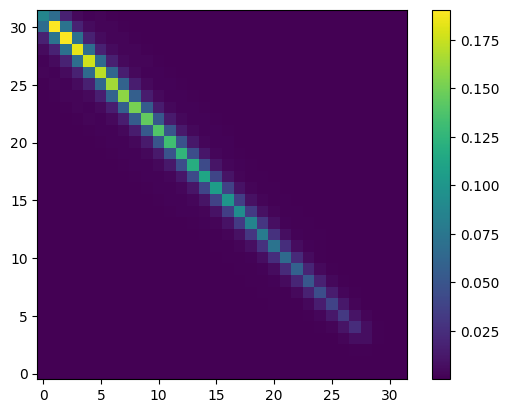

In [74]:
plt.imshow((dlu.downsample(psf,4)),origin='lower')
plt.colorbar()
plt.show()

In [23]:
# I think this works... I'm pretty certain that it does
# It relatively chill. Also works ultra quickly
# Well done me
# Now just need to impliment for multiple different types of source
# Including a binary source type with different spectra

# It correctly discretely changes the positions of the point sources according to the pixel scale

# Need to get it working for the 'scene' object OR can define new type of source
# which is just list of point sources with individual spectra / wavelengths
